<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Siamese_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first we import the dependencies
import tensorflow as tf

mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model
#here we use the sequential API for creating the model


img_A_inp=Input((28,28),name='img_A_inp')
img_B_inp=Input((28,28),name='img_B_inp')

In [3]:
#now we define the convolutional block function to call in the convolutional layers
def get_cnn_block(depth):
  return Sequential([Conv2D(depth,3,1),
                     BatchNormalization(),
                     ReLU()])


DEPTH=64

cnn=Sequential([Reshape((28,28,1)),
                get_cnn_block(DEPTH),
                get_cnn_block(DEPTH*2),
                get_cnn_block(DEPTH*4),
                get_cnn_block(DEPTH*8),
                GlobalAveragePooling2D(),
                Dense(64,activation='relu')
                ])


feature_vector_A=cnn(img_A_inp)
feature_vector_B=cnn(img_B_inp)  #used to get the feature vectors
#of the image

concat=Concatenate()([feature_vector_A,feature_vector_B])

dense=Dense(64,activation='relu')(concat)

output=Dense(1,activation='sigmoid')(dense)

#now we need to wrap the model

model=Model(inputs=[img_A_inp,img_B_inp],outputs=output)

#we now print the model.summary() to get the summary of the model

model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img_A_inp (InputLayer)      [(None, 28, 28)]             0         []                            
                                                                                                  
 img_B_inp (InputLayer)      [(None, 28, 28)]             0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 64)                   1586496   ['img_A_inp[0][0]',           
                                                                     'img_B_inp[0][0]']           
                                                                                                  
 concatenate (Concatenate)   (None, 128)                  0         ['sequential_4[0][0]',    

In [4]:
import numpy as np

random_indices=np.random.choice(x_train.shape[0],100,replace=False)
x_train_sample,y_train_sample=x_train[random_indices],y_train[random_indices]

x_train_sample.shape,y_train_sample.shape

((100, 28, 28), (100,))

In [5]:
#now we try to bring our inputs into the correct format

import itertools

def make_paired_dataset(x,y):
  x_pairs,y_pairs=[],[]
  tuples=[(x1,y1) for x1,y1 in zip(x,y)]


  for t in itertools.product(tuples,tuples):
    pair_A,pair_B=t
    img_A,label_A=t[0]
    img_B,label_B=t[1]

    new_label=int(label_A==label_B)

    x_pairs.append([img_A,img_B])
    y_pairs.append(new_label)


    #now we need to change them into numpy arrays

  x_pairs=np.asarray(x_pairs)

  y_pairs=np.asarray(y_pairs)

  return(x_pairs,y_pairs)

In [6]:
make_paired_dataset(x_train_sample,y_train_sample)


(array([[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0

In [7]:
x_train_pairs,y_train_pairs=make_paired_dataset(x_train_sample,y_train_sample)
x_train_pairs.shape,y_train_pairs.shape

((10000, 2, 28, 28), (10000,))

In [13]:
#now we should prepare the test dataset
import numpy as np

random_indices=np.random.choice(x_test.shape[0],40,replace=False)
x_test_sample,y_test_sample=x_test[random_indices],y_test[random_indices]

x_test_sample.shape,y_test_sample.shape

((40, 28, 28), (40,))

In [14]:
make_paired_dataset(x_test_sample,y_test_sample)

(array([[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
 
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0

In [8]:
#now after preprocessing the data we would now need to
#compile the model

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])


In [11]:
#here we introduce the callbacks
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(patience=3,monitor='loss')


In [12]:
#now we try to fit our model
model.fit(x=[x_train_pairs[:,0,:,:],x_train_pairs[:,1,:,:]],y=y_train_pairs,epochs=15,batch_size=128,
          callbacks=[es])

Epoch 1/15
79/79 [==============================] - 12s 147ms/step - loss: 0.2826 - accuracy: 0.8958
Epoch 2/15
79/79 [==============================] - 12s 148ms/step - loss: 0.2643 - accuracy: 0.8974
Epoch 3/15
79/79 [==============================] - 12s 149ms/step - loss: 0.2348 - accuracy: 0.9004
Epoch 4/15
79/79 [==============================] - 12s 150ms/step - loss: 0.2450 - accuracy: 0.9010
Epoch 5/15
79/79 [==============================] - 12s 151ms/step - loss: 0.2430 - accuracy: 0.8987
Epoch 6/15
79/79 [==============================] - 12s 152ms/step - loss: 0.1992 - accuracy: 0.9151
Epoch 7/15
79/79 [==============================] - 12s 152ms/step - loss: 0.1714 - accuracy: 0.9252
Epoch 8/15
79/79 [==============================] - 12s 153ms/step - loss: 0.1171 - accuracy: 0.9510
Epoch 9/15
79/79 [==============================] - 12s 153ms/step - loss: 0.1143 - accuracy: 0.9516
Epoch 10/15
79/79 [==============================] - 12s 154ms/step - loss: 0.1010 - accura

In [23]:
#now lets get the predictions from  the model

img_A,img_B=x_test[0],x_test[17] #the first and the ninth image respectively

label_A,label_B=y_test[0],y_test[17]

label_A,label_B


(7, 7)

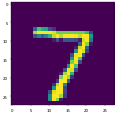

In [24]:
import matplotlib.pyplot as plt
plt.figure(dpi=28)
plt.imshow(img_A)

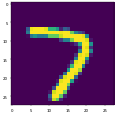

In [25]:
import matplotlib.pyplot as plt
plt.figure(dpi=28)
plt.imshow(img_B)

In [26]:
#now lets see what the model predicts
model.predict([img_A.reshape((1,28,28)),img_B.reshape((1,28,28))])

#probability that the classes are the same is good


1/1 [==============================] - 0s 22ms/step


array([[0.9999155]], dtype=float32)